# 2.155/6 Challenge Problem 2
<font size="1">
  Created by L. Regenwetter in Oct. 2023;   Artwork by Jessica Shung. </font>

## setup dependencies

In [1]:
!git clone https://github.com/Lyleregenwetter/CP2_2023_public.git
%cd CP2_2023_public/

Cloning into 'CP2_2023_public'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 38 (delta 3), reused 6 (delta 2), pack-reused 29
Receiving objects: 100% (38/38), 26.49 MiB | 19.64 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/CP2_2023_public


In [ ]:
!pip install autogluon

  Using cached autogluon-0.8.2-py3-none-any.whl (9.7 kB)
  Using cached autogluon.core-0.8.2-py3-none-any.whl (224 kB)
  Using cached autogluon.features-0.8.2-py3-none-any.whl (62 kB)
  Using cached autogluon.tabular-0.8.2-py3-none-any.whl (285 kB)
  Using cached autogluon.multimodal-0.8.2-py3-none-any.whl (372 kB)
  Using cached autogluon.timeseries-0.8.2-py3-none-any.whl (116 kB)
  Using cached boto3-1.28.70-py3-none-any.whl (135 kB)
  Using cached autogluon.common-0.8.2-py3-none-any.whl (61 kB)
  Using cached ray-2.3.1-cp310-cp310-manylinux2014_x86_64.whl (58.5 MB)
  Using cached grpcio-1.50.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
  Using cached jsonschema-4.17.3-py3-none-any.whl (90 kB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py) ... done
  Using cached evaluate-0.3.0-py3-none-any.whl (72 kB)
  Using cached accelerate-0.16.0-py3-none-any.whl (199 kB)
  Using cached timm-0.9.8-py3-none-any.whl (2.2 MB)
  Using cached torc

In [24]:
from utils_public import *
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from autogluon.tabular import TabularPredictor

ModuleNotFoundError: ignored

# The problem statement

## The advisors
**The Wellness Advisor:** With a background in the parks & rec department of the city government, the wellness advisor is focused on the health and wellbeing (both physical and mental) of citizens. Among other things, they are very invested in the quality and accessibility of city's green spaces.

**The Tax Advisor:** With a background in the revenue department of the city government, the tax advisor is focused on balancing city expenditures with income and keeping the city's economy afloat. Among other things, they are invested in maximizing property value and reducing city expenditures.  

**The Transportation Advisor**: As a former executive in the local public transportation authority, the transportation advisor places an emphasis on accessibility and emissions. Among other objectives, they are focused on mimizing the distance over which the workforce needs to commute.

**The Business advisor:** As a professor emeritus of economics at the state college in the city, the economic advisor is fixated on the general economic prosperity of the city's businesses and inhabitants. Among other things, they prioritize the overall economic output of the city.

## Understanding City Zoning:
Cities are often comprised of districts. Typically, the city government zones areas allowing them some amount of control over what goes on in each distict. To simplify, we will be represing city districts as discrete spaces in a 7x7 grid. Each grid space will be filled with exactly one of five types of zones. We will discuss the districts below:

**Residential Zones [0]:** Residential zones are comprised primarily of housing and are where the workforce lives

**Industrial Zones [1]:** Industrial zones are the manufacturing centers of the city, packed with factories producing food and goods.

**Commercial Zones [2]:** Commercial zones are the retail hubs of the city, consisting of markets, stores, and restaurants.

**Park Zones [3]:** City parks are the green spaces of the city -- small tastes of nature within an urban environment.

**Office Zones [4]:** Office zones are the enterprise centers of global corporations and local businesses alike.

In [21]:
# load the data
grids = load_grids() #Helper function we have provided to load the grids from the dataset
grids.shape #Check shape

ratings = np.load("datasets/scores.npy") #Load advisor scores
score_order = ["Wellness", "Tax", "Transportation", "Business"] #This is the order of the scores in the dataset
ratings_df = pd.DataFrame(ratings, columns = score_order) #Create a dataframe

display(ratings_df) #Print dataframe

,Wellness,Tax,Transportation,Business
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
499995,NaN,NaN,NaN,NaN
499996,NaN,NaN,NaN,NaN
499997,NaN,NaN,NaN,NaN
499998,NaN,NaN,NaN,NaN


## The Task:
**Satisfying the Advisors:**
You are tasked with finding zoning layouts that "satisfy" all four advisors, meaning that they each assign a score of at least 0.85. If even one of the advisors rates a layout under a 0.85, it will be rejected as a candidate. You much identify designs from the dataset or generate new designs that *you believe* will be accepted by the advisors.

**Identifying a diverse set:** The mayor has asked for a variety of "diverse" design candidates -- 100 city layouts to be exact -- which they will show to the advisors. The overall diversity of all valid (non-rejected) designs will be calculated. With this diversity metric, more designs is always better, so it is in your best interest to ensure that as few of your submitted designs are rejected as possible.

We have provided the function we will use to evaluate diversity. Here are a few tests to build some intuition with the diversity score.

# Your Code

Time to get coding! We recommend you start by training some regressors to predict the advisor scores. From there, it's up to you to generate or select city designs that you think will satisfy the requirements!

###Hints:
1. The advisors pay a lot of attention to the **adjacency** of districts as well as the **distances** from certain types of districts to others.
2. This is a grid-structured city. What **distance metric** is appropriate?
3. Though adding **novel** varied designs to your final set will increase the diversity score most, **duplicates** of valid designs will still slightly increase the diversity score, whereas invalid designs will not (see utils function for exact calculation).



In [ ]:
# make ratings a simple 0 for invalid design and 1 for valid design instead of trying to predict the score
valid_threshold = 0.85


In [ ]:
# We provided a small helper function that grabs the labeled subset of the dataset for some advisor:
#grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,0]) #gets subset of the dataset rated by advisor 0
#print(grids_subset.shape)
#print(ratings_subset.shape)

(4999, 7, 7)
(4999,)


## functions

In [9]:
# method to convert a ratings array to a valid/invalid array
def convert_to_valid_invalid(ratings, threshold=0.85):
  valid_invalid = np.empty(ratings.size)
  valid_invalid = np.array([1 if x>threshold else 0 for x in ratings])

  # check the conversion was correct
  for ind, score in enumerate(ratings):
    if score > threshold:
      if np.round(valid_invalid[ind]) != 1:
        print("this was wrong")
    else:
      if np.round(valid_invalid[ind]) != 0:
        print("this was wrong")

  return valid_invalid

print("function loaded")

function loaded


In [ ]:
# compute r2 score of predictions
def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i):
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#F08E18") #Train set in orange
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #Test set in magenta
    plt.plot([0,1], [0,1], label="target", linewidth=3, c="k") # Target line in Black
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Advisor {i} Predictions")
    plt.legend()
    plt.show()
    print(f"Train Set R2 score: {r2_score(ratings_train, preds_train)}") #Calculate R2 score
    print(f"Test Set R2 score: {r2_score(ratings_test, preds_test)}")

print("function loaded")

In [8]:
def count_correct_wrong_valid(preds, actuals, threshold = 0.85):
  # function to evaluate how accurate the valid/invalid predictions are
  # preds - 1D array of the predicted score (or valid/invalid)
  # actuals - 1D array of the actual design score (or valid/invalid)
  # threshold - the score threshold to consider a design valid or not valid

  # this is dirty code, but it doesn't matter if a valid/invalid array is put
  # through the convertion because 0 is always less than the threshold and 1 is higher than the threshold
  preds_bi = convert_to_valid_invalid(preds, threshold = threshold)
  actual_bi = convert_to_valid_invalid(actuals, threshold = threshold)

  totalCount = len(preds)

  correctCount = 0
  wrongCount = 0
  for ind, val_pred in enumerate(preds_bi):
    val_actual = actual_bi[ind]
    if round(val_pred) == round(val_actual):
      correctCount += 1
    if round(val_pred) != round(val_actual):
      wrongCount += 1

  # sanity check
  if totalCount != correctCount + wrongCount:
    print("something went wrong with count_correct_wrong")

  print("got " + str(correctCount) + " right and got " + str(wrongCount) + " wrong")

  return correctCount, correctCount/totalCount, wrongCount, wrongCount/totalCount

print("function loaded")


function loaded


In [12]:
# function to calculate the confusion matrix
def calc_confusion_matrix_vals(preds, actuals, threshold=0.85):
  # inputs:
  # preds - 1D array of the predicted score (or valid/invalid)
  # actuals - 1D array of the actual design score (or valid/invalid)
  # threshold - the score threshold to consider a design valid or not valid

  # this is dirty code, but it doesn't matter if a valid/invalid array is put
  # through the convertion because 0 is always less than the threshold and 1 is higher than the threshold
  preds_bi = convert_to_valid_invalid(preds, threshold = threshold)
  actual_bi = convert_to_valid_invalid(actuals, threshold = threshold)

  # total number of designs
  totalCount = len(preds)
  # number of valid designs
  validCount = (actual_bi > threshold).sum()
  # number of invalid designs
  invalidCount = (actual_bi >= threshold).sum()

  ## sanity check
  if totalCount != validCount + invalidCount:
    print("something went wrong in the confusion matrix")

  TV_count = 0 # true valid
  FV_count = 0 # false valid
  TI_count = 0 # true invalid
  FI_count = 0 # false invalid

  for ind, val_pred in enumerate(preds_bi):
    val_actual = actual_bi[ind]
    if val_pred > threshold: # predicted valid
      if val_actual > threshold: # actually valid
        TV_count += 1
      else:
        FV_count += 1
    else: # predicted not valid
      if val_actual > threshold: # actually valid
        FI_count += 1
      else:
        TI_count += 1

    print("actual number valid: " + str(validCount) + ", actual number invalid: " + str(invalidCount))
    print("true valid:" + str(TV_count) + ", false valid:" + str(FV_count))
    print("false invalid: " + str(FI_count) + ", true invalid: " + str(TI_count))

  return TV_count, FV_count, TI_count, FI_count, validCount, invalidCount

print("function loaded")


function loaded


In [6]:
# function to compare the accuracy of classifications
def check_valid_invalid_accuracy(preds_train, preds_test, ratings_train, ratings_test, threshold=0.85):

  preds_train_valid_invalid = convert_to_valid_invalid(preds_train, threshold=threshold)
  preds_test_valid_invalid = convert_to_valid_invalid(preds_test, threshold=threshold)

  ratings_train_valid_invalid = convert_to_valid_invalid(ratings_train, threshold=threshold)
  ratings_test_valid_invalid = convert_to_valid_invalid(ratings_test, threshold=threshold)

  # a prediction for valid/invalid is right if both the prediction and rating have same value
  # a prediction is wrong if one has 1 and the other has 0
  # so I can get the number of wrong labels by summing
  train_wrong_count = sum(abs(preds_train_valid_invalid - ratings_train_valid_invalid))
  test_wrong_count = sum(abs(preds_test_valid_invalid - ratings_test_valid_invalid))
  test_error_rate = test_wrong_count/len(ratings_test)
  train_error_rate = train_wrong_count/len(ratings_train)

  print("for training data valid/invalid: got " + str(train_wrong_count) + " out of " + str(len(ratings_train)) + " wrong")
  print("for test data valid/invalid: got " + str(test_wrong_count) + " out of " + str(len(ratings_test)) + " wrong")

  return 1-train_error_rate, 1-test_error_rate

print("function loaded")

function loaded


In [5]:
# A little function to get all the predictions for the dataset, but overwrite the
# prediction for the datapoints where the ground truth value is known.
def get_predictions(grids, ratings, predictor):
    grids = grids.reshape(grids.shape[0], 49)
    grids_df = pd.DataFrame(grids, columns = range(grids.shape[1]))
    predictions = predictor.predict(grids_df).values
    mask = np.where(~np.isnan(ratings))
    predictions[mask] = ratings[mask]
    return predictions

print("function loaded")

function loaded


## main
Let's compile all of that into a single functon then loop over the four advisors to get a set of predictions for all of them:

In [16]:
# single function to get predictions for an advisor
def fit_plot_predict(grids, ratings, i, threshold = 0.85, useBinaryB = False):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor i
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    # make ratings a simple 0 for invalid design and 1 for valid design instead of trying to predict the score
    valid_threshold = 0.85
    #ratings_subset_bi = np.empty(ratings_subset.size)
    #ratings_subset_bi = np.array([1.0 if x>valid_threshold else 0.0 for x in ratings_subset])

    ratings_subset_bi = convert_to_valid_invalid(ratings_subset, threshold=threshold)

    # feed in ratings_subset or ratings_subset_bi
    if useBinaryB:
      grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset_bi)
    else:
      grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)

    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    all_train = pd.concat([grids_train, preds_train], axis=1)

    predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {'NN_TORCH':{}, 'GBM':{}, 'RF':{}, 'XT':{}, 'KNN':{}})

    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)
    print("for advisor " + str(i))
    check_valid_invalid_accuracy(preds_train, preds_test, ratings_train, ratings_test)
    print("training set")
    calc_confusion_matrix_vals(preds_train, ratings_train)
    print("test set")
    calc_confusion_matrix_vals(preds_test, ratings_test)


    predictions = get_predictions(grids, ratings[:,i], predictor)
    return predictions, predictor

print("function loaded")

function loaded


In [22]:
# loop over advisors to get predictions for all of them

all_predictions = []
all_predictors = []
useBinaryB = True
for i in range(0,1):
    predictions, predictor = fit_plot_predict(grids, ratings, i, threshold=0.85, useBinaryB=useBinaryB)
    all_predictions.append(predictions)
    all_predictors.append(predictor)

NameError: ignored

We stack the predictions together and identify the lowest advisor score for each design. According to the regressors in the starting notebook, it's quite possible that none of the designs in the dataset are predicted to satisfy all four advisors with scores above 0.9 across the board. This is a problem! Despite this, we indentify the 100 designs with the highest minimum score and submit those.

In [ ]:
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

Number of valid grids (as predicted): 18
best predicted scores: [1 1 1 1]


We visualize the score histograms and the grids of the top 10 designs.

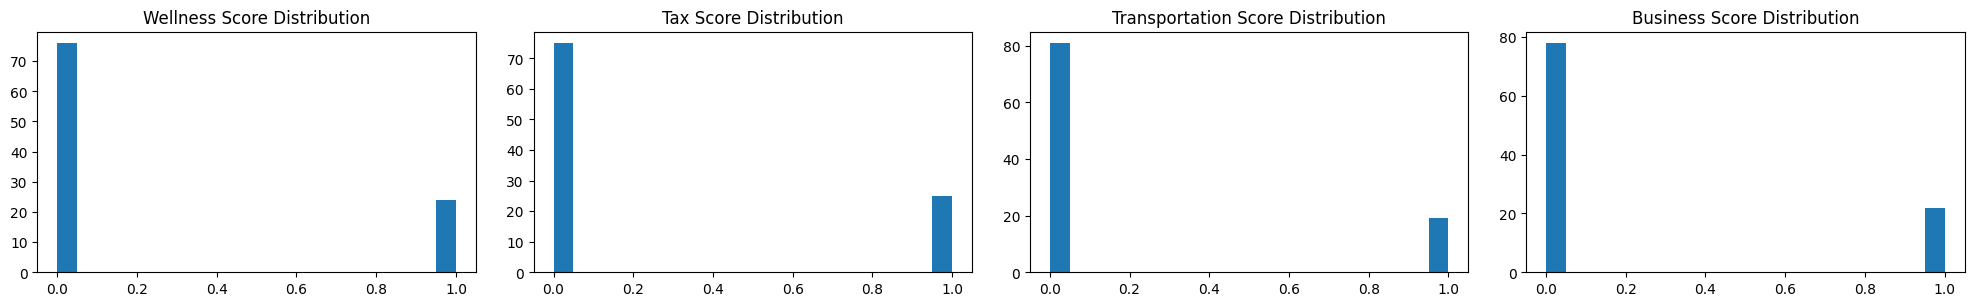

In [ ]:
plot_ratings_histogram(final_prediction_array[top_100_indices])

<Figure size 640x480 with 0 Axes>

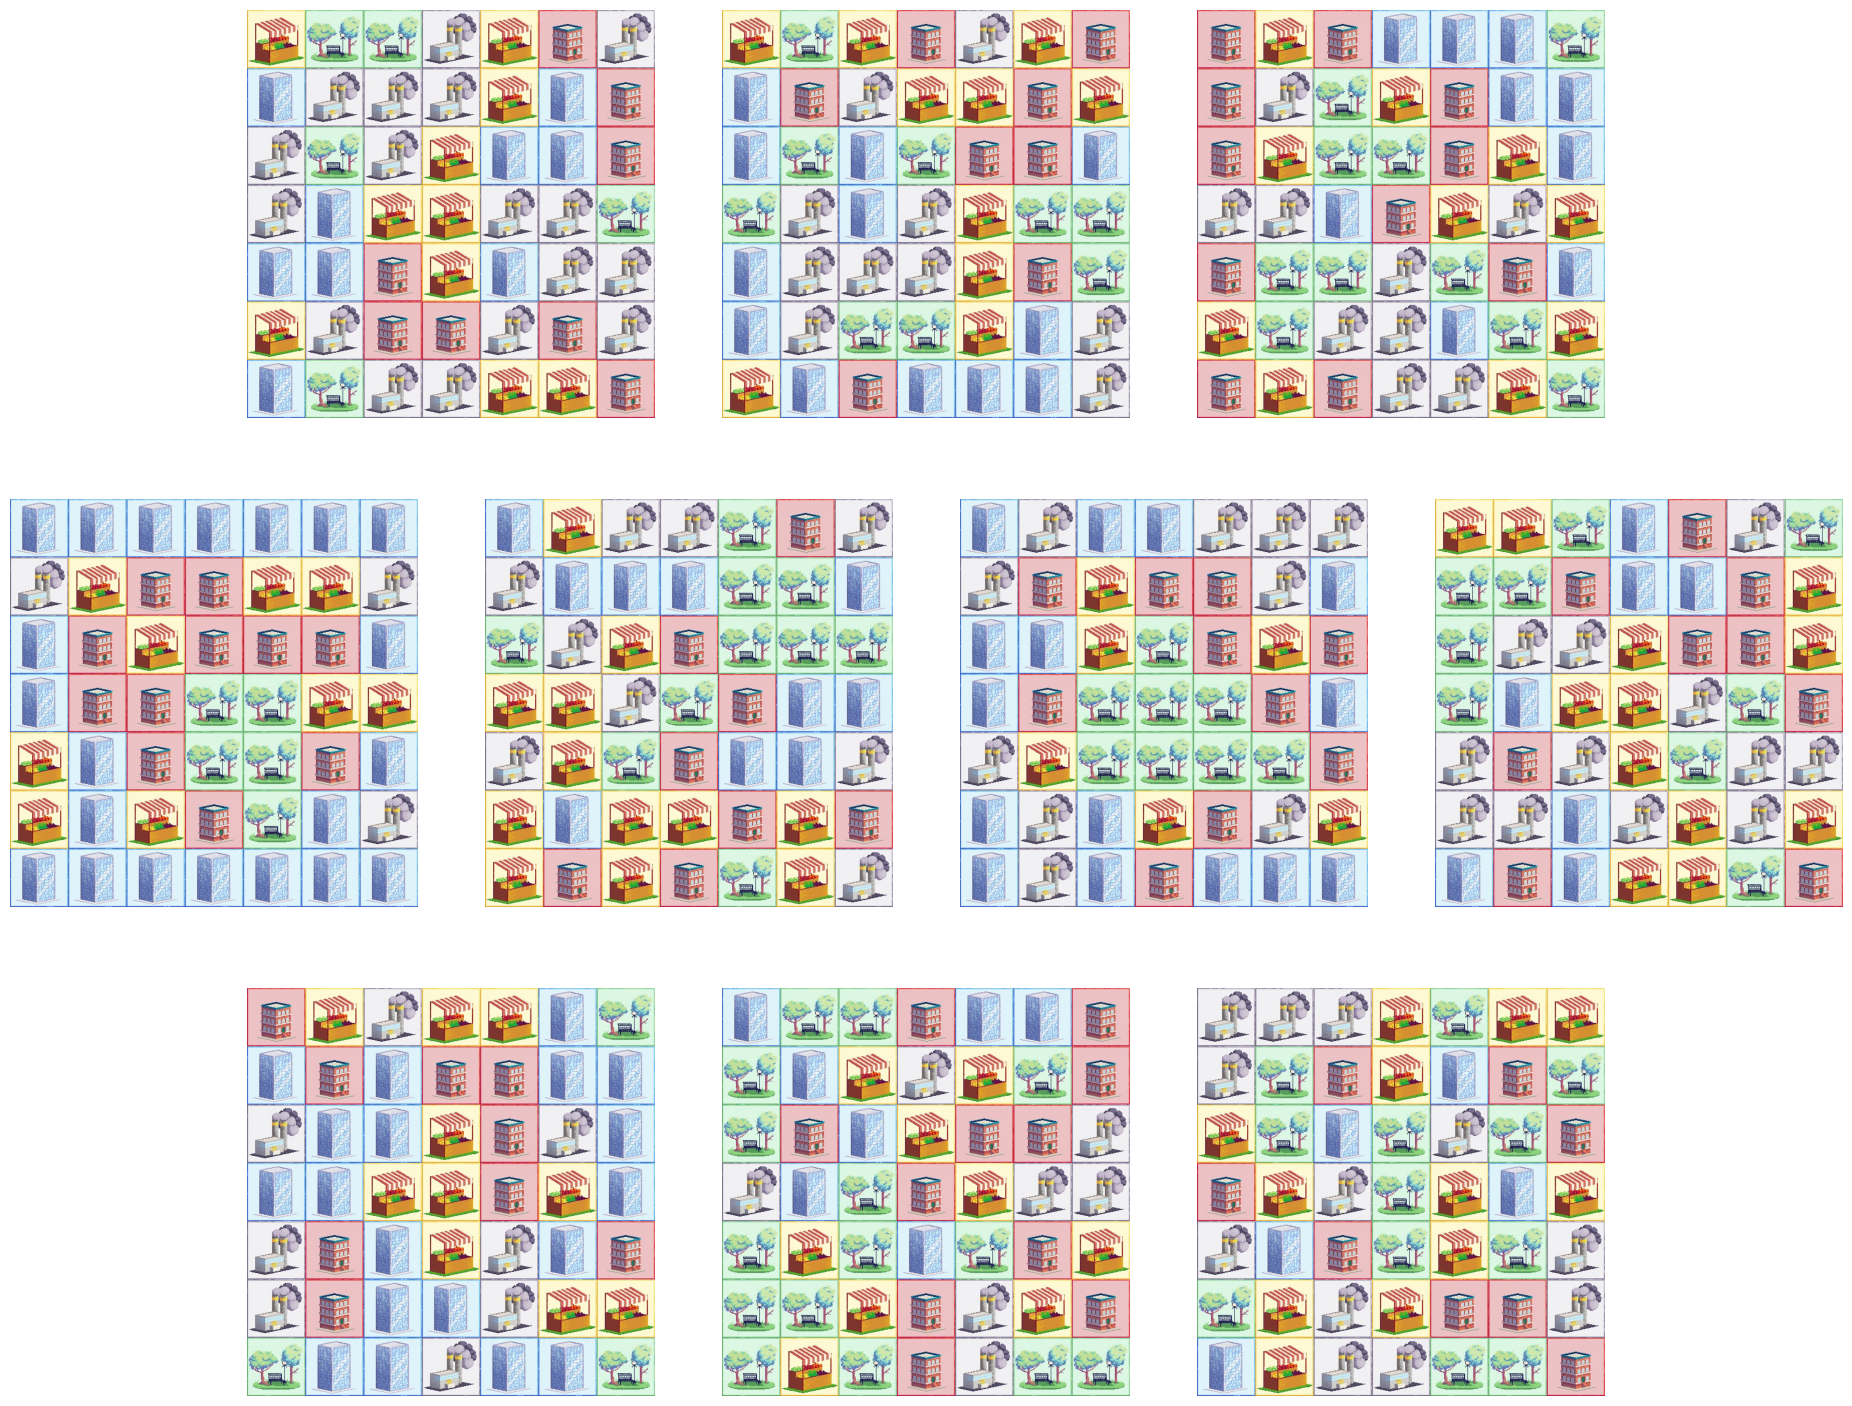

In [ ]:
plot_n_grids(grids[top_100_indices][-10:])

### Preparing a submission
Let's prepare a submission. We expect the final submission to be a 100x7x7 numpy array of integers between 0 and 4, inclusive. Note: we do NOT need your predicted scores. We will ask the advisors to score your submissions directly!
You can verify that your submission is formatted properly with the following asserts:

In [ ]:
final_submission = grids[top_100_indices].astype(int)

In [ ]:
assert final_submission.shape == (100, 7, 7)
assert final_submission.dtype == int
assert np.all(np.greater_equal(final_submission, 0) & np.less_equal(final_submission, 4))

We need each submission to have a unique submission ID for scoring. Generate a random ID and save the file using that ID:

In [ ]:
id = np.random.randint(1e8, 1e9-1)
np.save(f"{id}.npy", final_submission)


You can download the file from colab in the filetree found in the side panel:

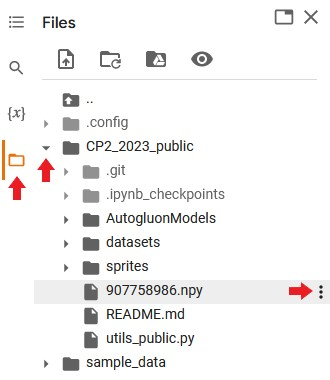

## Bonus: Training a Generative Model

You may also want to train a generative model to create new grid designs to supplement the options provided from the mayor. You may find that randomly generated designs don't tend to perform very well. Here, we have provided a simple Variational Autoencoder implementation, which can be used to synthesize new grids.

In [ ]:
grids_OH = (np.arange(5) == grids[...,None]).astype(int) #One-hot encode grids
print(grids_OH.shape)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class VAE(nn.Module): #Create VAE class inheriting from pytorch nn Module class
    def __init__(self, input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride):
        super(VAE, self).__init__()

        # Create encoder model
        self.encoder = Encoder(input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride)

        #Create decoder after calculating input size for decoder
        decoder_input_size = self.calculate_decoder_input_size(image_size, num_layers, kernel_size, stride)
        self.decoder = Decoder(input_channels, hidden_size, num_layers, latent_dim, decoder_input_size, kernel_size, stride)

    def calculate_decoder_input_size(self, image_size, num_layers, kernel_size, stride):
        #Function to calculate the input size of the decoder given its architecture
        h, w = image_size
        for _ in range(num_layers):
            h = (h - kernel_size) // stride + 1
            w = (w - kernel_size) // stride + 1
        return h, w

    def reparameterize(self, mu, logvar):
        #Sample from gaussian
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        #Pass through encoder, reparameterize using mu and logvar as given by the encoder, then pass through decoder
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

class Encoder(nn.Module): #Encoder model of VAE
    def __init__(self, input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride):
        super(Encoder, self).__init__()

        layers = []
        h, w = image_size
        in_channels = input_channels
        for _ in range(num_layers): # Loop over layers, adding conv2d, layernorm, and relu.
            h = (h - kernel_size) // stride + 1 #Update h and w to compensate for previous layers output
            w = (w - kernel_size) // stride + 1
            layers.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, hidden_size, kernel_size, stride),
                    nn.LayerNorm([hidden_size, h, w]),
                    nn.ReLU()
                )
            )
            in_channels = hidden_size #Input channels to later conv layers will just be the hidden size

        self.conv_layers = nn.ModuleList(layers) #Collect convolution layers and layernorm in conv_layers object
        self.final_flatten_size = h * w * hidden_size #Calculate size of final FC output layer
        self.fc_mu = nn.Linear(self.final_flatten_size, latent_dim) #Final FC layer to output mean
        self.fc_logvar = nn.Linear(self.final_flatten_size, latent_dim) #Final FC layer to output logvar

    def forward(self, x): #Forward call for encoder
        for layer in self.conv_layers: #Call conv layers sequentially
            x = layer(x)
        x = x.view(x.size(0), -1) #Flatten x
        mu = self.fc_mu(x) #Get mu and logvar from FC layers
        logvar = self.fc_logvar(x)
        return mu, logvar #Return mu and logvar

class Decoder(nn.Module):  #Decoder model of VAE
    def __init__(self, output_channels, hidden_size, num_layers, latent_dim, decoder_input_size, kernel_size, stride):
        super(Decoder, self).__init__()
        self.decoder_input_size = decoder_input_size
        self.hidden_size = hidden_size

        #Initial fully connected layer
        self.fc = nn.Linear(latent_dim, hidden_size * decoder_input_size[0] * decoder_input_size[1])
        layers = []
        h, w = decoder_input_size
        for _ in range(num_layers-1): # Loop over layers, adding conv2dtranspose, layernorm, and relu.
            h = (h - 1) * stride + kernel_size #Update h and w to compensate for previous layers output
            w = (w - 1) * stride + kernel_size
            layers.append(
                nn.Sequential(
                    nn.ConvTranspose2d(hidden_size, hidden_size, kernel_size, stride),
                    nn.LayerNorm([hidden_size, h, w]),
                    nn.ReLU()
                )
            )

        self.deconv_layers = nn.ModuleList(layers) #Collect deconv layers

        #Final layer brings the image to the original size
        self.final_layer = nn.ConvTranspose2d(hidden_size, output_channels, kernel_size, stride)

    def forward(self, z):
        z = self.fc(z) #Call initial FC layer
        z = z.view(z.size(0), self.hidden_size, self.decoder_input_size[0], self.decoder_input_size[1])  # Reshape to match the deconvolution input shape
        for layer in self.deconv_layers: #Sequentially call deconv layers
            z = layer(z)
        z = self.final_layer(z)
        return torch.sigmoid(z) #Final sigmoid layer

def loss_function(recon_x, x, mu, logvar):
    # VAE loss is a sum of KL Divergence regularizing the latent space and reconstruction loss
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum') # Reconstruction loss from Binary Cross Entropy
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) #KL Divergence loss
    return BCE + KLD

def train(epoch, data_tensor): #Train function for one epoch of training
    model.train()
    train_loss = 0
    num_batches = len(data_tensor) // batch_size

    #Tqdm progress bar object contains a list of the batch indices to train over
    progress_bar = tqdm(range(num_batches), desc='Epoch {:03d}'.format(epoch), leave=False, disable=False)

    for batch_idx in progress_bar: #Loop over batch indices
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        data = data_tensor[start_idx:end_idx] #Gather corresponding data

        optimizer.zero_grad() #Set up optimizer
        recon_batch, mu, logvar = model(data) #Call model
        loss = loss_function(recon_batch, data, mu, logvar) #Call loss function
        loss.backward() #Get gradients of loss
        train_loss += loss.item() #Append to total loss
        optimizer.step() #Update weights using optimizeer

        # Updating the progress bar
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item())})

    average_train_loss = train_loss / len(data_tensor) #Calculate average train loss
    tqdm.write('Epoch: {} \tTraining Loss: {:.3f}'.format(epoch, average_train_loss))

Let's set up our data. We will onehot-encode the data so that each grid is a 5x7x7 tensor of booleans.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Check if gpu is available, otherwise use cpu

grids_oh = (np.arange(5) == grids[...,None]).astype(int) # Onehot encode
grids_tensor = torch.from_numpy(grids_oh) # Torch tensor from numpy
grids_tensor = grids_tensor.permute(0, 3, 1, 2) # Reshape to organize data by [batch, district, x, y]
grids_tensor = grids_tensor.float() # Ensure we are using floats
grids_tensor = grids_tensor.to(device) # Send the tensor to device

We set up a model:

In [ ]:
#Keep fixed for 7x7 grid with 5 district options
input_channels = 5
image_size = (7, 7)

#Can tune these parameters
latent_dim = 20
hidden_size = 128
num_layers = 2
kernel_size = 3
stride = 1
num_epochs = 60
batch_size = 1024

model = VAE(input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride).to(device) #Instantiate the VAE
optimizer = optim.Adam(model.parameters(), lr=1e-3) #Instantiate the Optimizer

#Let's look at a model summary
from torchsummary import summary
summary(model, input_size=(input_channels, image_size[0], image_size[1]))

Time to train!

In [ ]:
# Main loop
for epoch in range(1, num_epochs + 1): #Loop over num_epochs
    train(epoch, grids_tensor) #Call train function for each epoch

Let's take a look at how well out VAE is able to regenerate city designs. Remember, though, that that our VAE is generating onehot encodings. We need some method to select a district given a set of onehot-encoded values. For example, if our VAE generates [0.1, 0.4, 0.9, 0.2, 0.0] for a particular grid tile, how do we select a district? We implement two approaches. One is a simple argmax, which would deteministically select [2] (commercial) with 100% probability. We also implement a probabilistic selection approach which would select [0] with (1/16) chance, [1] with (1/4) chance, [2] with (9/16) chance, and [3] with (1/8) chance:

In [ ]:
def argmax_sample(grids): #Expects a BATCH of one-hot encoded grids (nx7x7x5)
    return torch.argmax(grids, axis=3)
def probabilistic_sample(grids): #Expects a BATCH of one-hot encoded grids (nx7x7x5)
    flattened_grids = grids.reshape(grids.shape[0]*7*7, 5)
    flattened_grids = torch.multinomial(flattened_grids, num_samples=1)
    grids = flattened_grids.reshape(grids.shape[0],7,7)
    return grids


We can test the VAE's reconstruction capabilities:

In [ ]:
def reconstruct_from_vae(model, samples, device='cpu'):
    #Function to reconstruct city grids
    with torch.no_grad(): #Faster inference if model does not need to calculate gradients
        samples = model(samples)[0] #Pass samples through VAE
        samples = samples.permute(0, 2, 3, 1) #Reshuffle dimensions to be [batch, x, y, district]
        samples = argmax_sample(samples) #Can switch to probabilistic sample
    return samples.to('cpu').numpy()

def plot_reconstruction(originals, reconstructions):
    # Function to plot reconstructed city grids alongside originals
    n = len(originals)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(9, 4*n))
    for i in range(n): # Loop over the grids
        plot_grid_image(originals[i], on_ax=axes[i, 0]) # Plot original on the left
        plot_grid_image(reconstructions[i], on_ax=axes[i, 1]) #Plot reconstructed on the right
    fig.tight_layout()
    plt.show()

originals = np.random.choice(np.arange(len(grids)), size=5, replace=False) #Select 5 random indices
reconstructions = reconstruct_from_vae(model, grids_tensor[originals], device) #Reconstruct
plot_reconstruction(grids[originals], reconstructions) #Compare

Ok, time for the big moment! Let's generate some fresh city designs from the VAE. We will use the probabilistic sampling here, but you are free to adjust.

In [ ]:
def sample_from_vae(model, num_samples, latent_dim, device='cpu'):
    #Function to generate new samples from VAE
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim, device=device) #Sample from N(0,1) Gaussian
        samples = model.decoder(z) #Pass noise into decoder to sample a batch of  grid
        samples = samples.permute(0, 2, 3, 1) #Reshuffle dimensions to be [batch, x, y, district]
        samples = probabilistic_sample(samples) #Can switch to argmax sample
    return samples.to('cpu').numpy()
samples = sample_from_vae(model, 7, latent_dim, device)
plot_n_grids(samples) #Plot generated grids

Let's compare the score distributions across generated samples to the dataset. For a baseline, we will also try randomly generated grids where each grid location is sampled independently and uniformly. Note: these scores are calculated according to our trained regressors and may not be perfectly accurate!

In [ ]:
generated_samples = sample_from_vae(model, 1000, latent_dim, device) #Sample from VAE
random_samples = np.random.choice(np.arange(5), size = (1000,7,7)) #Randomly Sample Grids

In [ ]:
def score_samples(samples): #Function to score all samples. Requires trained regressors in all_predictors object
    samples = samples.reshape(samples.shape[0], 49) #Reformat data into the format regressors expect
    samples = pd.DataFrame(samples, columns = range(grids_subset.shape[1]), dtype = "object")
    sample_predictions = []
    for i in range(4): #Loop over advisores
        predictor = all_predictors[i] #Select appropriate regressor
        sample_predictions.append(predictor.predict(samples)) #Call regressor
    sample_predictions = np.stack(sample_predictions).T #Stack scores together
    return sample_predictions
generated_sample_predictions = score_samples(generated_samples)
random_sample_predictions = score_samples(random_samples)

In [ ]:
import seaborn as sns
def compare_violinplots(all_predictions, all_names):
    #Wrangle dataframe predictions into the format expected by seaborn violinplot
    all_dfs = []
    for i in range(len(all_predictions)):
        df = pd.DataFrame(all_predictions[i], columns=["Wellness", "Tax", "Transportation", "Business"])
        df["Minimum Score"] = np.min(df.values, axis=1) #Calculate minimum score over the four advisors for every grid
        df = pd.melt(df, var_name = "Advisor", value_name = "Score")
        df['Method'] = all_names[i]
        all_dfs.append(df)
    all_dfs = pd.concat(all_dfs, axis=0)
    plt.figure(figsize=(10,5))

    #Plot the distributions
    sns.violinplot(x="Advisor", y="Score", hue="Method", data=all_dfs, linewidth=1, palette = ["#F08E18", "#888888", "#DC267F"])

all_predictions = [generated_sample_predictions, random_sample_predictions, final_prediction_array[:1000]] #Select only the last 1000 of the dataset for speed
all_names = ["VAE-Generated", "Random-Generated", "Dataset Subset"]
compare_violinplots(all_predictions, all_names) #Plot!

If you trained strong regressors, you should likely see that the dataset is much better performing, compared to random sampling. While the VAE may not generate quite as strong-performing designs as the dataset on average, it should generate better designs than the random sampler. Note: these observatons may not be apparant with a weak regressor.